In [4]:
import numpy as np
import pandas as pd

x = [32,62,96,118,126,144,152,158]
y = [17,24,62,48,52,105,130,125]

A = np.column_stack((x, np.ones((8))))
B = np.array(y)
A

array([[ 32.,   1.],
       [ 62.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [5]:
A.T # transpose (전치)

array([[ 32.,  62.,  96., 118., 126., 144., 152., 158.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]])

In [6]:
np.linalg.inv(A.T@A)@A.T@B

array([  0.87372521, -26.60849858])

In [7]:
np.c_[x,y]

array([[ 32,  17],
       [ 62,  24],
       [ 96,  62],
       [118,  48],
       [126,  52],
       [144, 105],
       [152, 130],
       [158, 125]])

In [8]:
x = [32,62,96,118,126,144,152,158]
y = [17,24,62,48,52,105,130,125]
# 포뮬러 사용, 회귀분석하기

print(x+y) # 리스트 + 리스트 >> 연장 

df = pd.DataFrame(np.c_[x,y], columns=['x','y'])
df

[32, 62, 96, 118, 126, 144, 152, 158, 17, 24, 62, 48, 52, 105, 130, 125]


,x,y
0,32,17
1,62,24
2,96,62
3,118,48
4,126,52
5,144,105
6,152,130
7,158,125


In [9]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept   -26.608499
x             0.873725
dtype: float64

In [10]:
import numpy as np

n_samples = 30

np.random.seed(32)

x = np.sort(np.random.rand(n_samples))

print(x)

y = np.sin(2*np.pi*x) + np.random.randn(n_samples)*0.1
print(y)

[0.04993276 0.09178413 0.09290995 0.10108656 0.16062408 0.16242374
 0.34518624 0.37271115 0.44171349 0.45201847 0.46096041 0.55148779
 0.55512878 0.56179184 0.58940123 0.59655344 0.60910917 0.66275252
 0.70371249 0.70937058 0.7366696  0.76635847 0.81077677 0.81620514
 0.85888927 0.90252139 0.91090833 0.92848807 0.95565655 0.99942549]
[ 0.31257747  0.4924615   0.50014348  0.5044662   0.95518498  0.91972895
  0.71969055  0.83900738  0.69446454  0.21370543  0.20880573 -0.50375103
 -0.3394168  -0.34341141 -0.38049562 -0.63817663 -0.5392955  -0.92160958
 -0.97811515 -0.96934095 -1.17528561 -1.07989647 -1.09079909 -0.81802132
 -0.76963143 -0.545924   -0.52475491 -0.54416844 -0.26197402 -0.02214347]


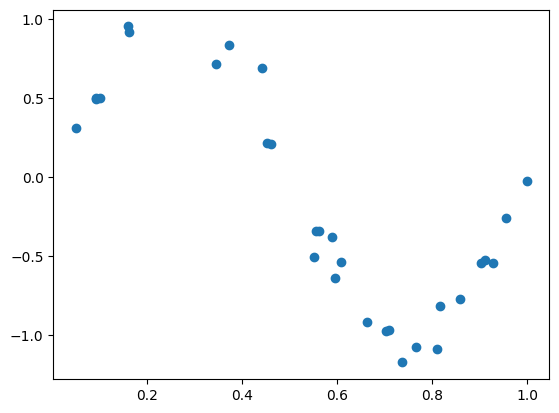

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(x,y)
plt.show()

In [12]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.c_[x,y], columns=["x", "y"])
df.head()

,x,y
0,0.049933,0.312577
1,0.091784,0.492461
2,0.092910,0.500143
3,0.101087,0.504466
4,0.160624,0.955185


In [13]:
from statsmodels.formula.api import ols

model = ols("y~x", data=df)
result = model.fit()
result.params

Intercept    0.796121
x           -1.767435
dtype: float64

In [14]:
np.linspace(0,1,30)

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

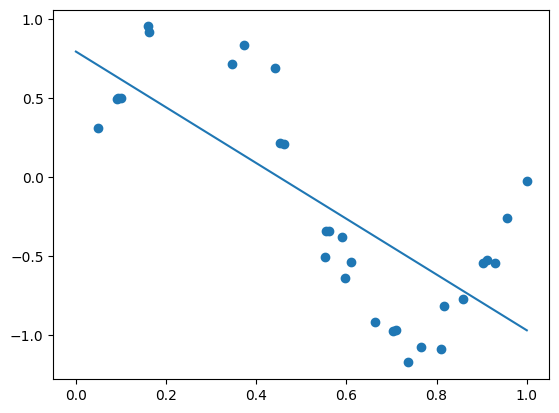

In [15]:
plt.scatter(x,y)

xx = np.linspace(0,1,1000)
plt.plot(xx, result.predict({"x":xx}))
plt.show()

In [16]:
# 9차 방정식 

from statsmodels.formula.api import ols 

model9 = ols("y~x + I(x**2)+I(x**3)+I(x**4)+I(x**5)+\
I(x**6)+I(x**7)+I(x**8)+I(x**9)", data=df)

result9 = model9.fit()
result9.params

Intercept        0.936315
x              -30.661976
I(x ** 2)      500.551484
I(x ** 3)    -3295.972248
I(x ** 4)    11846.756263
I(x ** 5)   -25785.583571
I(x ** 6)    34615.565544
I(x ** 7)   -27897.981516
I(x ** 8)    12360.192707
I(x ** 9)    -2313.821972
dtype: float64

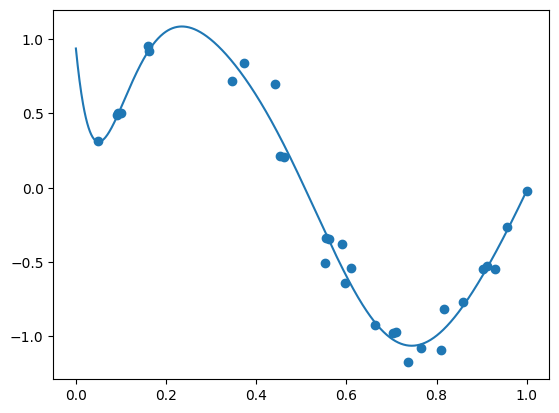

In [17]:
plt.scatter(x,y)
plt.plot(xx, result9.predict({"x": xx}))
plt.show()

규제(reqularization)

In [18]:
# ridge (l2 규제)
result9 = model9.fit_regularized(L1_wt=0, alpha=0.01)
print(result9.params)

[ 0.72630608 -0.93085523 -1.14136826 -0.75213326 -0.29673205  0.07731935
  0.34977452  0.53528692  0.65445346  0.72549093]


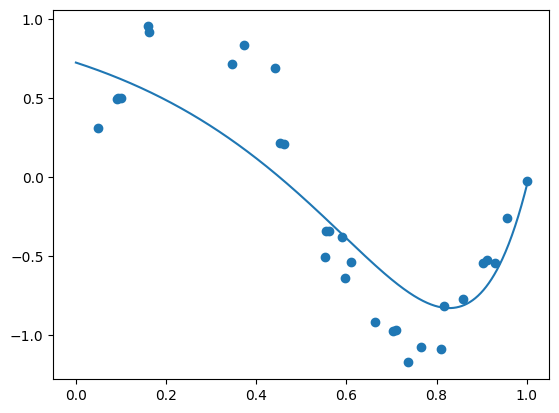

In [19]:
plt.scatter(x,y)
plt.plot(xx, result9.predict({"x": xx}))
plt.show()

In [20]:
# Lasso (L1 규제)
# L1_wt=1
result9 = model9.fit_regularized(L1_wt=1, alpha=0.01)
print(result9.params)

Intercept    0.807165
x           -1.431832
I(x ** 2)   -1.027298
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.612351
I(x ** 9)    0.882136
dtype: float64


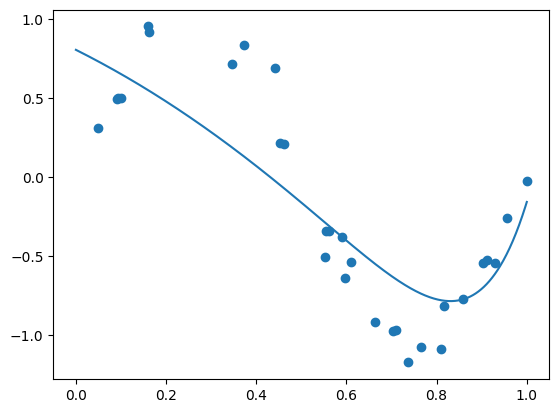

In [21]:
plt.scatter(x,y)
plt.plot(xx, result9.predict({"x": xx}))
plt.show()

In [22]:
# Elastic (L1 + L2)
# L1_wt=0.5
result9 = model9.fit_regularized(L1_wt=0.5, alpha=0.01)
print(result9.params)

Intercept    0.000000
x            0.470542
I(x ** 2)   -1.409376
I(x ** 3)   -0.908984
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.229604
I(x ** 8)    0.614736
I(x ** 9)    0.821529
dtype: float64


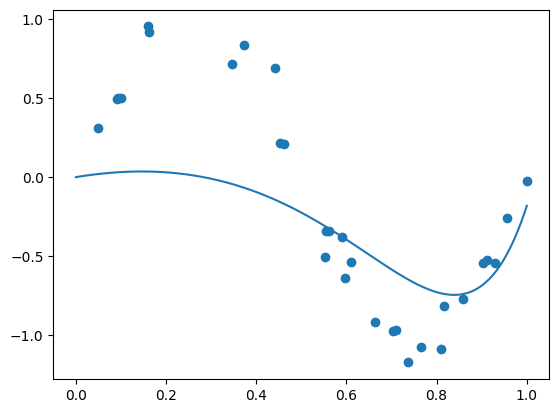

In [23]:
plt.scatter(x,y)
plt.plot(xx, result9.predict({"x":xx}))
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import statsmodels.api as sm

In [25]:
np.random.seed(32)

# 실데이터로 간주(무작위 숫자 생성, 각각 30)
x = np.sort(np.random.rand(30))
y = np.sin(2*np.pi*x) + np.random.rand(30)*0.1

xx = x[:, np.newaxis]

print(x)
print(y)

[0.04993276 0.09178413 0.09290995 0.10108656 0.16062408 0.16242374
 0.34518624 0.37271115 0.44171349 0.45201847 0.46096041 0.55148779
 0.55512878 0.56179184 0.58940123 0.59655344 0.60910917 0.66275252
 0.70371249 0.70937058 0.7366696  0.76635847 0.81077677 0.81620514
 0.85888927 0.90252139 0.91090833 0.92848807 0.95565655 0.99942549]
[ 0.31212988  0.59874656  0.56782386  0.62413576  0.85092875  0.87624733
  0.89390571  0.79544066  0.42761345  0.32982621  0.29224376 -0.26548174
 -0.30964499 -0.33225804 -0.43416807 -0.52001573 -0.59329402 -0.78067758
 -0.87167225 -0.96497513 -0.96749268 -0.91581552 -0.88225679 -0.91402825
 -0.73300944 -0.54182781 -0.47058413 -0.40189348 -0.17690221  0.05521343]


In [26]:
print(xx)

[[0.04993276]
 [0.09178413]
 [0.09290995]
 [0.10108656]
 [0.16062408]
 [0.16242374]
 [0.34518624]
 [0.37271115]
 [0.44171349]
 [0.45201847]
 [0.46096041]
 [0.55148779]
 [0.55512878]
 [0.56179184]
 [0.58940123]
 [0.59655344]
 [0.60910917]
 [0.66275252]
 [0.70371249]
 [0.70937058]
 [0.7366696 ]
 [0.76635847]
 [0.81077677]
 [0.81620514]
 [0.85888927]
 [0.90252139]
 [0.91090833]
 [0.92848807]
 [0.95565655]
 [0.99942549]]


In [27]:
def plot_model(model):
    plt.scatter(x,y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(9)
print(poly)
model = make_pipeline(poly, LinearRegression()).fit(xx, y)

print(model.steps[1][1].coef_)

PolynomialFeatures(degree=9)
[     0.             18.71720231   -168.21965006   1074.52545645
  -4094.46405168   8939.51611377 -11517.19967099   8690.74590524
  -3536.51985726    593.27350316]


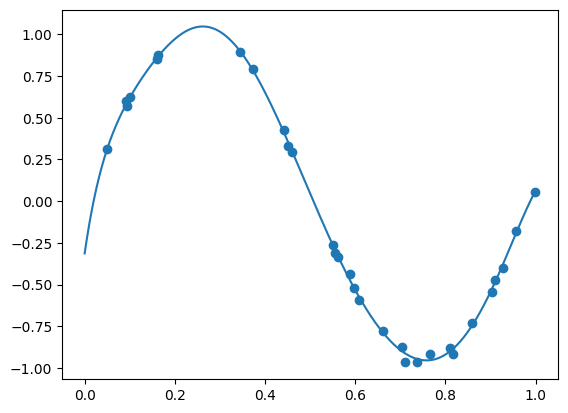

In [29]:
plot_model(model)

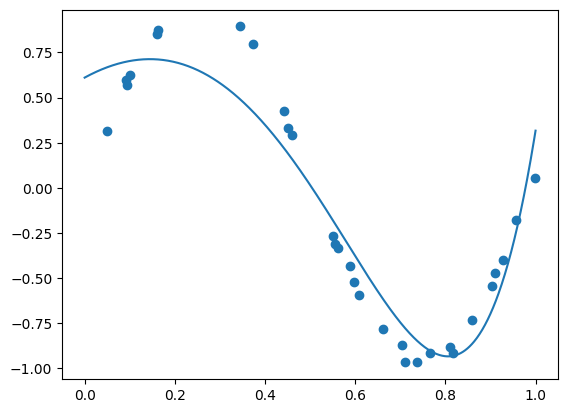

In [32]:
# ridge 회귀모형

from sklearn.linear_model import Ridge

model = make_pipeline(poly, Ridge(alpha=0.01)).fit(xx, y)

plot_model(model)


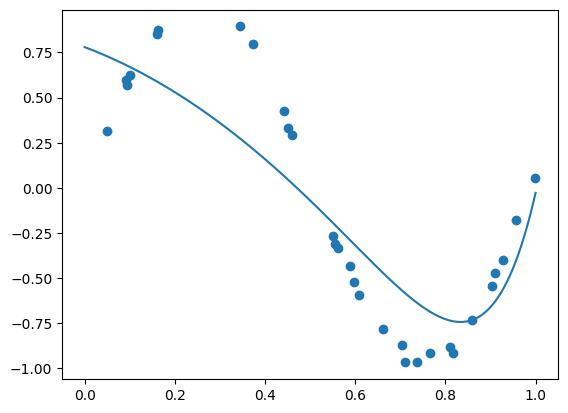

In [34]:
# Lasso 회귀모형

from sklearn.linear_model import Lasso

model = make_pipeline(poly, Lasso(alpha=0.01)).fit(xx, y)

plot_model(model)

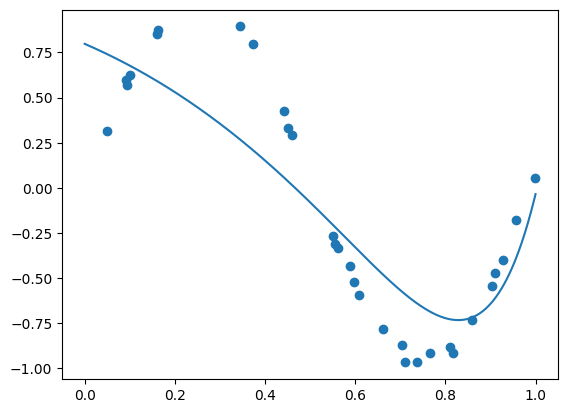

In [35]:
# Elastic Net 회귀모형

from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model = make_pipeline(poly, elastic).fit(xx, y)

plot_model(model)

-----------

1. 주택가격 예측 회귀분석_보스턴 집값

데이터 

http://lib.stat.cmu.edu/datasets/boston

In [36]:
# hstack
import numpy as np

# 두 개의 배열 생성

a = np.array([1,2,3])
b = np.array([4,5,6])

# 배열을 수평으로 쌓음
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6])

In [42]:
# 배열을 수직으로 쌓음
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# 데이터 수집

import re
import numpy as np
import pandas as pd

url = "http://lib.stat.cmu.edu/datasets/boston"
# 정규표현식을 사용하여 URL에서 필요한 부분을 추출
boston = pd.read_csv(url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([boston.values[::2, :], boston.values[1::2, :3]])

In [66]:
boston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]], shape=(506, 14))

In [68]:
pd.DataFrame(boston)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [69]:
feature_names = ["CRIM","ZN","INDUS","CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "B",
                 "LSTAT","MEDV"]

In [ ]:
# CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

In [70]:
feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [72]:
pd.DataFrame(boston, columns=feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [74]:
boston = pd.DataFrame(boston, columns=feature_names)
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [76]:
# pwd

In [ ]:
boston.to_csv("./data/boston.csv", index=False)

In [78]:
boston.iloc[:, :-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [80]:
boston.iloc[:, -1]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
boston.shape
# 보스턴 주택 가격 데이터셋 크기
# 506: record, 14: 속성 정보 (차원)

(506, 14)

In [82]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


분석 모델 구축

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
# x, y 분할하기

x = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

In [85]:
# 훈련용 데이터와 평가용 데이터 분할하기

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [87]:
# 선형 회귀분석: 모델 생성
lr = LinearRegression()

In [ ]:
# 선형 회귀분석, 모델 훈련 (fit) >> 반드시 train data 사용
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [90]:
# 선형 회귀분석: 평가 데이터(test data)로 예측 수행
# >> 예측결과 y_hat (y_pred)

y_pred = lr.predict(x_test)

결과 분석 및 데이터 시각화

In [95]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R2 score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 24.291, RMSE : 4.929
R2 score : 0.669


In [96]:
print('y 절편:', lr.intercept_)
print('회귀계수:', np.round(lr.coef_, 1))

y 절편: 30.24675099392366
회귀계수: [ -0.1   0.    0.    2.8 -17.2   4.4  -0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


In [97]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [98]:
coef = pd.Series(data=np.round(lr.coef_,1), index=x.columns)
coef.sort_values(ascending=False) # 내림차순 정렬

RM          4.4
CHAS        2.8
RAD         0.3
INDUS       0.0
ZN          0.0
B           0.0
TAX        -0.0
AGE        -0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -17.2
dtype: float64

회귀 분석 결과 >> 산점도와 선형 회귀 그래프로 시각화

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
x_features = list(x.columns)
x_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

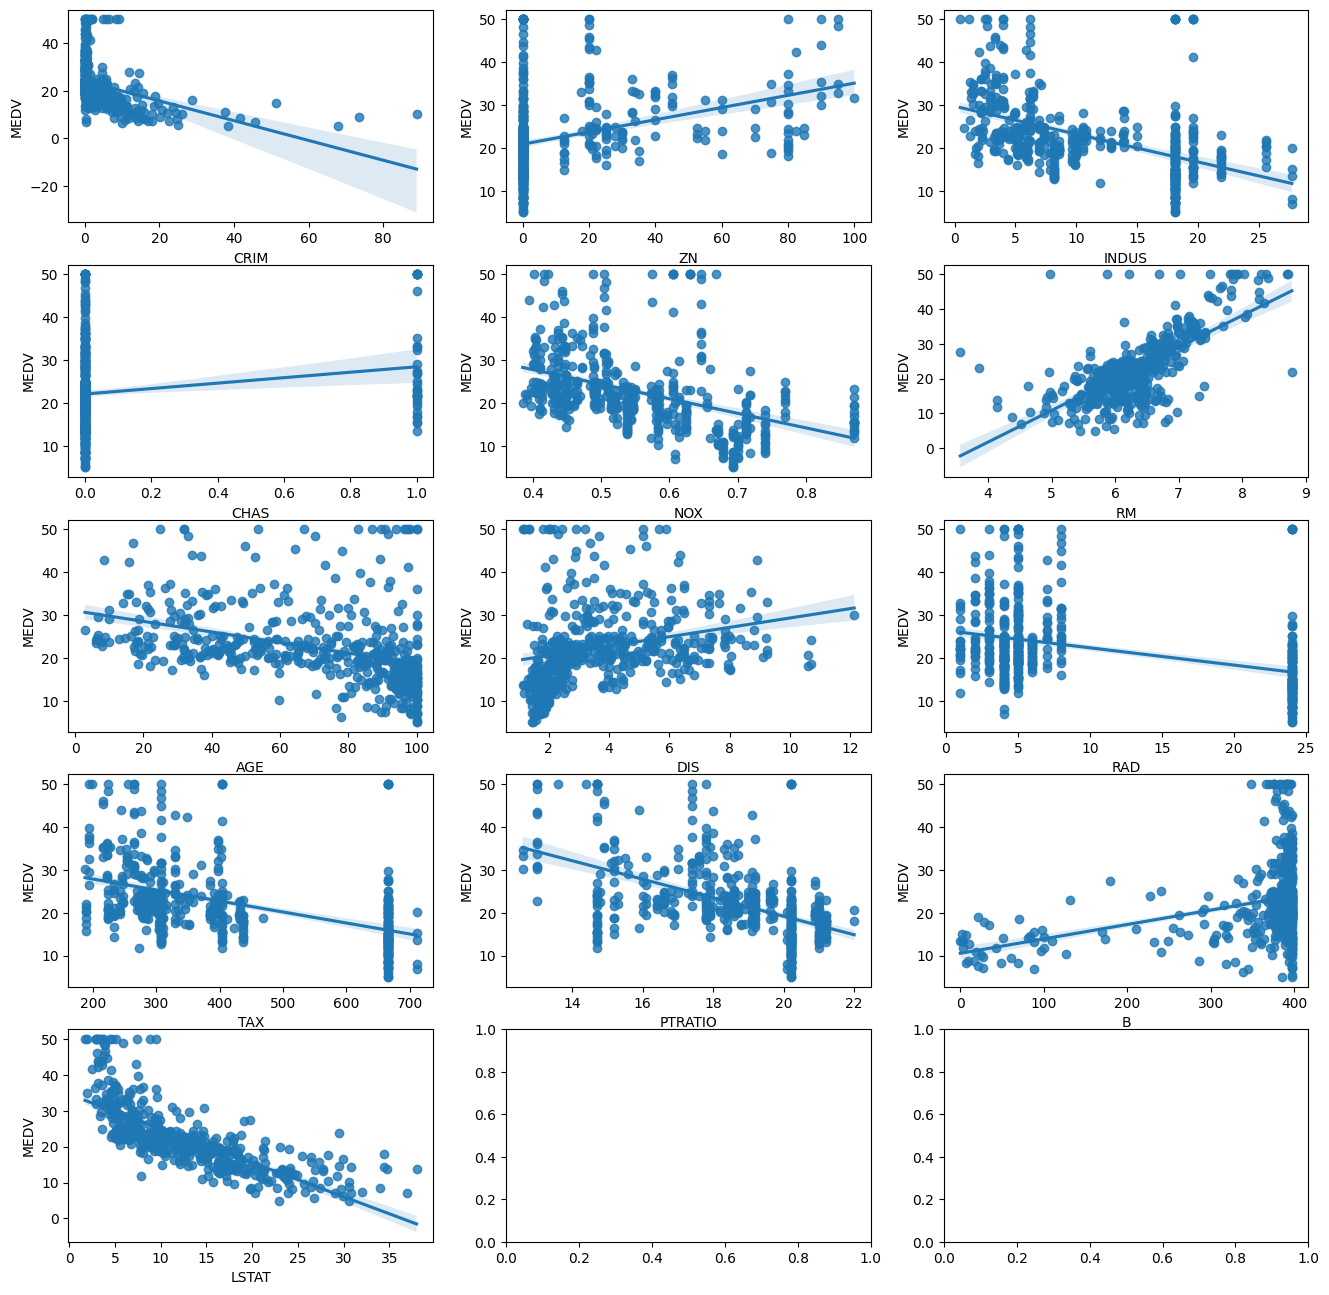

In [104]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=5)

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='MEDV', data=boston, ax=axs[row][col])

산점도와 회귀분석

데이터 수집

In [105]:
import numpy as np
import pandas as pd

In [ ]:
auto = pd.read_csv('./data/auto-mpg.csv', header=0, engine='python')
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


데이터 준비 및 탐색

In [107]:
# 데이터셋 크기 확인
auto.shape

(398, 9)

In [108]:
# 분석에서 제외할 변수

auto = auto.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
auto

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [109]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


분석 모델 구축

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
# x, y 분할

y = auto['mpg'] # mpg: mile per gallon (cf. kpl: km per liter) 연비
x = auto.drop(['mpg'], axis=1, inplace=False)

In [116]:
print(y)
print()
print(x)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

     cylinders  displacement  weight  acceleration  model_year
0            8         307.0    3504          12.0          70
1            8         350.0    3693          11.5          70
2            8         318.0    3436          11.0          70
3            8         304.0    3433          12.0          70
4            8         302.0    3449          10.5          70
..         ...           ...     ...           ...         ...
393          4         140.0    2790          15.6          82
394          4          97.0    2130          24.6          82
395          4         135.0    2295          11.6          82
396          4         120.0    2625          18.6          82
397          4         119.0    2720          19.4          82

[398 rows x 5 columns]


In [117]:
# 훈련용/테스트 데이터 분할

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [118]:
# 선형 회귀 분석: 모델 생성
lr = LinearRegression()

In [119]:
# 모델 훈련(fit >> train data)
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
y_pred = lr.predict(x_test)
y_pred

array([31.55530063, 30.68905579, 21.80699343, 16.98750418, 12.60540632,
       26.18220527, 28.90400773,  9.12932725, 17.2263025 , 22.72748429,
       12.64724664, 34.99860292, 26.65366916, 14.05377015, 24.81048136,
        5.91904198, 30.86103851, 23.77107121, 15.84883975, 35.13876234,
       23.46010907, 19.72127175, 29.30314676, 30.31152375, 15.13770624,
       34.50460261, 25.76340158, 25.77795876, 22.1712103 ,  7.95877504,
       29.37380102, 34.94123359, 20.00761663, 24.90309123, 33.10884447,
       12.14155939, 24.4533325 , 22.15537782, 12.38035609, 26.95056011,
       27.61412851, 27.409148  , 20.27797162,  7.61803953, 23.25740825,
       33.65968202, 26.62862863, 24.43589474, 22.74574056, 27.7057552 ,
       23.48482317, 32.53661224, 31.29782712, 10.53948915, 29.01666461,
        9.38025921, 19.45145993, 28.30972594, 24.25458098, 20.79124389,
       16.43259089, 30.76338901, 24.93185818, 20.29152606, 21.6551419 ,
       24.35255149, 25.88139241, 33.73576891, 29.30894257, 12.72

In [123]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
249    19.9
225    17.5
367    28.0
175    29.0
285    17.0
Name: mpg, Length: 80, dtype: float64

결과 분석 및 시각화

In [124]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:{0:.3f}, RMSE:{1:3f}".format(mse, rmse))
print('R2_score:{0:.3f}'.format(r2_score(y_test, y_pred)))

MSE:9.443, RMSE:3.072874
R2_score:0.824


In [125]:
print('y절편:', np.round(lr.intercept_,2))
print('회귀계수:', np.round(lr.coef_,2))

y절편: -18.21
회귀계수: [ 0.06  0.   -0.01  0.07  0.8 ]


In [126]:
coef = pd.Series(data=np.round(lr.coef_,2), index=x.columns)
coef.sort_values(ascending=False)

model_year      0.80
acceleration    0.07
cylinders       0.06
displacement    0.00
weight         -0.01
dtype: float64

회귀분석 결과 >> 산점도와 선형회귀그래프로 데이터 시각화

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
list(x.columns)

['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']

In [129]:
features = list(x.columns)

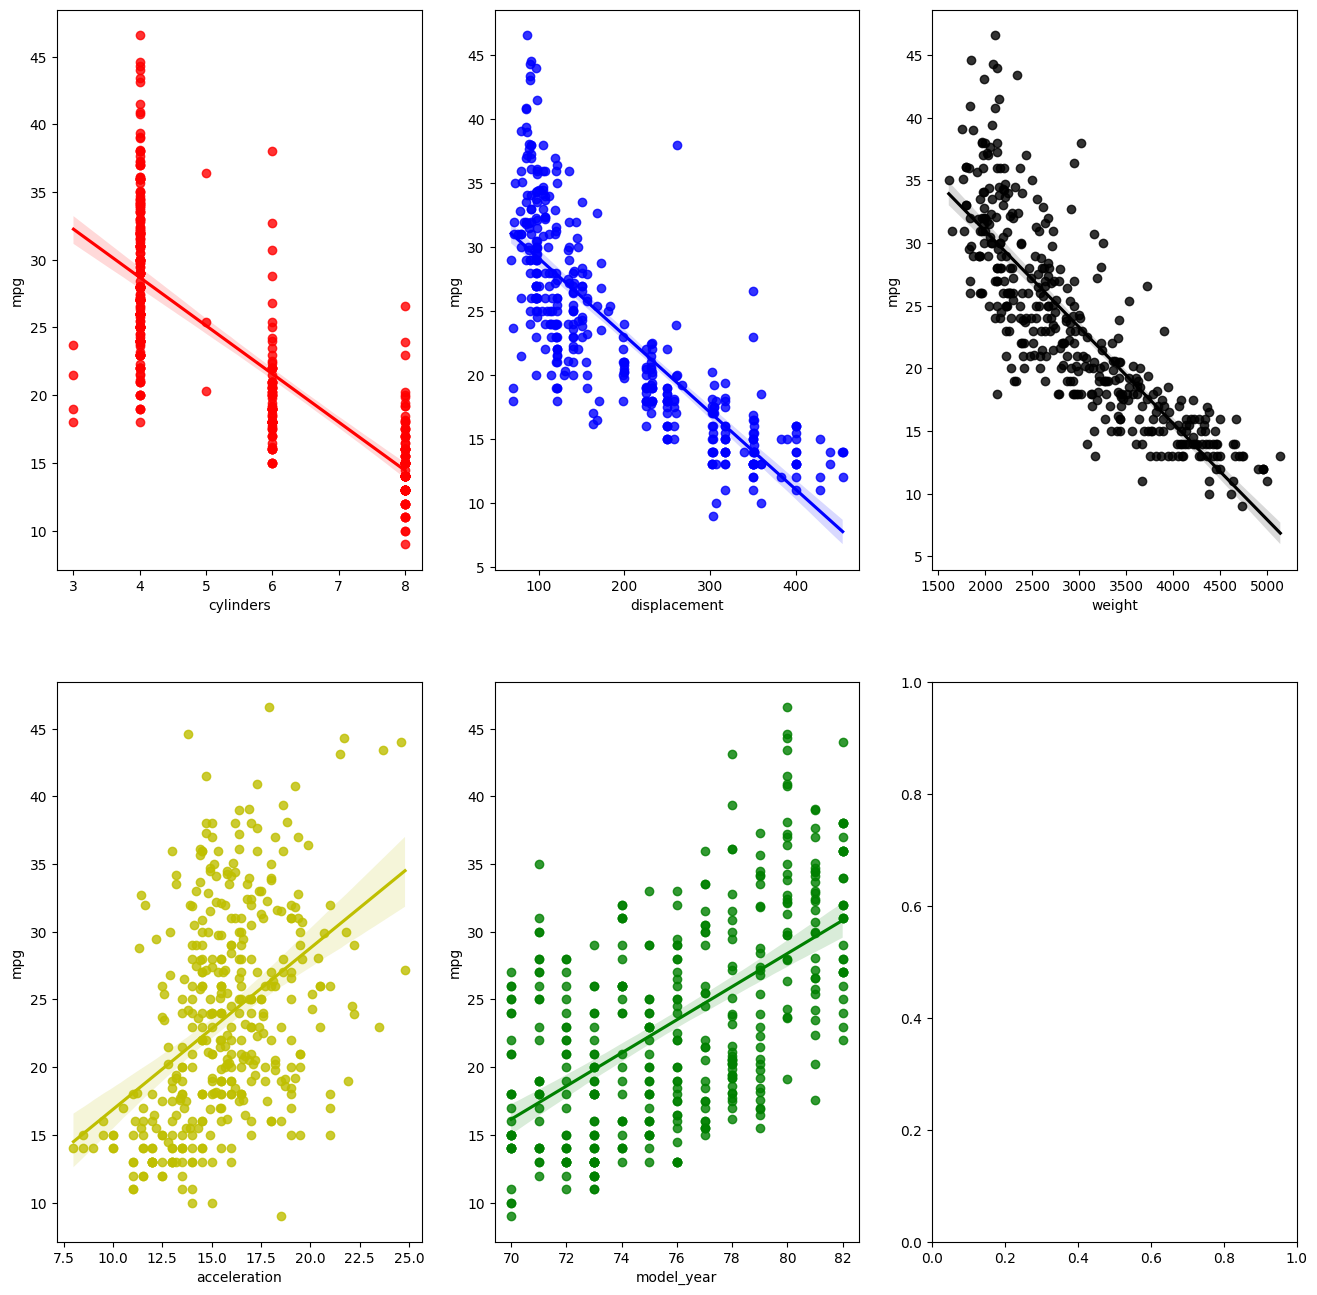

In [134]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)

plot_color = ['r', 'b', 'k', 'y', 'g']
features = list(x.columns)

for i, feature in enumerate(features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=auto, ax = axs[row][col], color=plot_color[i])

연비 예측하기

In [140]:
print("연비예측하기 프로그램")
print("연비를 예측하고 싶은 차종의 정보를 입력해 주세요.")

car_cylinder = int(input("cylinders:"))
car_displacement = int(input("displacement:"))
car_weight = int(input("weight:"))
car_acceleration = int(input("acceleration:"))
car_model_year = int(input("model_year:"))

print("car_cylinder:", car_cylinder)
print("car_displacement:", car_displacement)
print("car_weight:", car_weight)
print("car_acceleration:", car_acceleration)
print("car_model_year:", car_model_year)

연비예측하기 프로그램
연비를 예측하고 싶은 차종의 정보를 입력해 주세요.
car_cylinder: 6
car_displacement: 260
car_weight: 3200
car_acceleration: 22
car_model_year: 99


In [138]:
mpg_pred = lr.predict([[car_cylinder, car_displacement, car_weight, car_acceleration, car_model_year]])

/home/jindol/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [139]:
print("귀하의 자동차의 예상 연비(mpg)는 %.2f 입니다"%mpg_pred)

귀하의 자동차의 예상 연비(mpg)는 41.05 입니다


/tmp/ipykernel_34279/2715235211.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("귀하의 자동차의 예상 연비(mpg)는 %.2f 입니다"%mpg_pred)


--------------

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = './data/house_price.csv'

In [143]:
pd.read_csv(path, encoding='utf-8')

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000
...,...,...,...,...,...,...
17684,34,2.3013,0.214583,2.748299,4.897959,26600
17685,33,2.6750,0.246622,3.428571,4.698413,22500
17686,39,2.3667,0.340771,1.876812,3.572464,17500
17687,19,2.1000,0.386107,2.987805,3.774390,14999


In [144]:
df = pd.read_csv(path, encoding='utf-8')

df.head(3)

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [146]:
df.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<Axes: title={'center': 'housing_age'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'house_value'}>]], dtype=object)

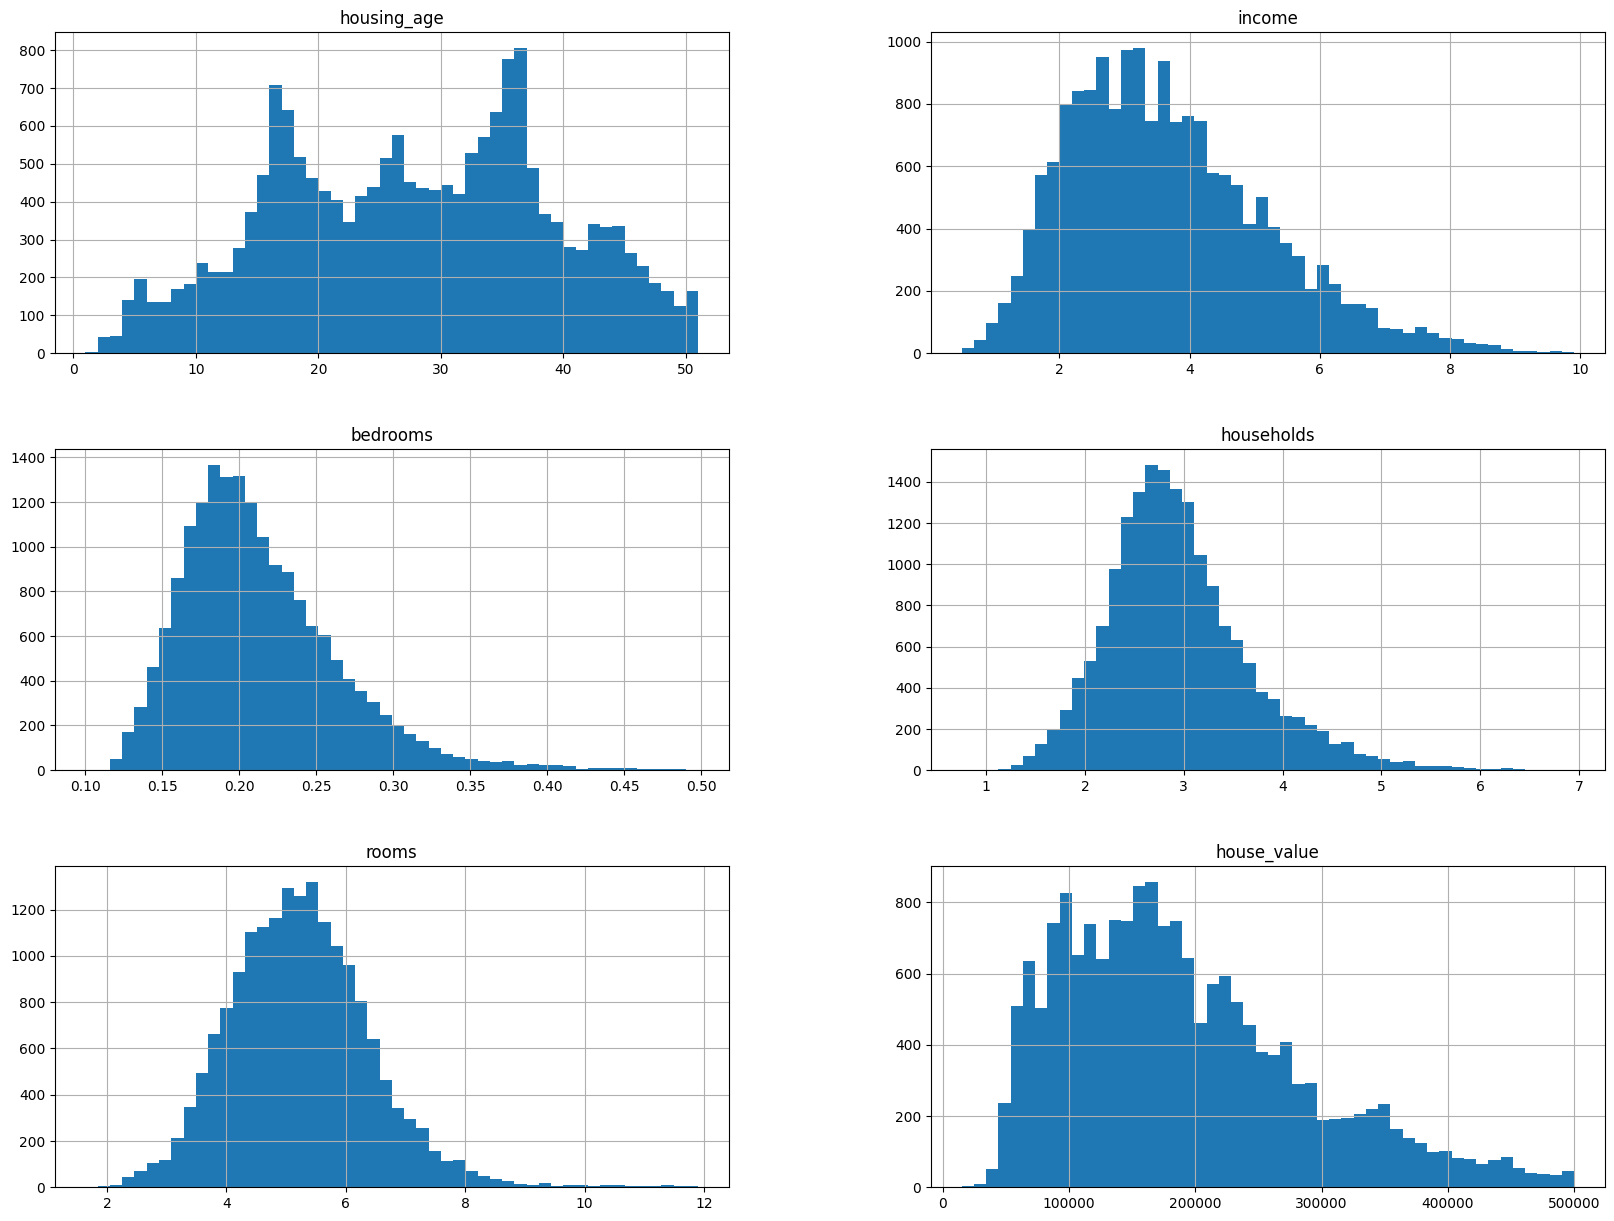

In [148]:
df.hist(bins=50, figsize=(20,15))

In [149]:
# 특성(x)과 레이블(y) 나누기

df.columns

Index(['housing_age', 'income', 'bedrooms', 'households', 'rooms',
       'house_value'],
      dtype='object')

In [150]:
x = df.iloc[:, :-1]
y = df[['house_value']]

In [152]:
print(x)
print()
print(y)

       housing_age  income  bedrooms  households     rooms
0               23  6.7770  0.141112    2.442244  8.103960
1               49  6.0199  0.160984    2.726688  5.752412
2               35  5.1155  0.249061    1.902676  3.888078
3               32  4.7109  0.231383    1.913669  4.508393
4               21  4.5625  0.255583    3.092664  4.667954
...            ...     ...       ...         ...       ...
17684           34  2.3013  0.214583    2.748299  4.897959
17685           33  2.6750  0.246622    3.428571  4.698413
17686           39  2.3667  0.340771    1.876812  3.572464
17687           19  2.1000  0.386107    2.987805  3.774390
17688           16  1.6607  0.286275    2.236842  6.710526

[17689 rows x 5 columns]

       house_value
0           500000
1           500000
2           500000
3           500000
4           500000
...            ...
17684        26600
17685        22500
17686        17500
17687        14999
17688        14999

[17689 rows x 1 columns]


In [153]:
df.shape, x.shape, y.shape

((17689, 6), (17689, 5), (17689, 1))

In [154]:
# train/test set 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [155]:
y_train.mean(), y_test.mean()

(house_value    189226.643434
 dtype: float64,
 house_value    188615.99755
 dtype: float64)

In [157]:
# 정규화

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sc_minmax = MinMaxScaler()
sc_standard = StandardScaler()

In [158]:
# 정규화

sc_minmax.fit(x_train)

x_scaled_minmax_train = sc_minmax.transform(x_train)
x_scaled_minmax_test = sc_minmax.transform(x_test)

In [163]:
# 표준화

sc_standard.fit(x_train)

x_scaled_standard_train = sc_standard.transform(x_train)
x_scaled_standard_test = sc_standard.transform(x_test)

In [164]:
pd.DataFrame(x_scaled_minmax_train)

,0,1,2,3,4
0,0.80,0.309837,0.264680,0.285626,0.314358
1,0.56,0.296547,0.204531,0.332263,0.417674
2,0.56,0.257836,0.273971,0.249125,0.313360
3,0.54,0.463256,0.094933,0.397497,0.497649
4,0.54,0.102237,0.973932,0.444333,0.030812
...,...,...,...,...,...
12377,0.14,0.274379,0.343617,0.527078,0.265255
12378,0.24,0.180956,0.415675,0.604698,0.245175
12379,0.80,0.231979,0.353930,0.552167,0.279833
12380,0.40,0.488092,0.194026,0.248180,0.435327


In [166]:
pd.DataFrame(x_scaled_minmax_train).describe()

,0,1,2,3,4
count,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000
mean,0.526547,0.336945,0.284849,0.357776,0.335417
std,0.225207,0.162217,0.129502,0.118197,0.117992
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.216509,0.194143,0.280132,0.254486
50%,0.540000,0.314238,0.261829,0.342847,0.330323
75%,0.700000,0.435783,0.352813,0.417305,0.406687
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
pd.DataFrame(x_scaled_standard_train).describe()

,0,1,2,3,4
count,1.238200e+04,1.238200e+04,1.238200e+04,1.238200e+04,1.238200e+04
mean,1.291166e-16,-1.755985e-16,2.754486e-16,5.382726e-16,5.508973e-17
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-2.338146e+00,-2.077202e+00,-2.199661e+00,-3.027078e+00,-2.842811e+00
25%,-8.283659e-01,-7.424620e-01,-7.004512e-01,-6.569280e-01,-6.859236e-01
50%,5.974024e-02,-1.399807e-01,-1.777628e-01,-1.263103e-01,-4.317560e-02
75%,7.702252e-01,6.093194e-01,5.248357e-01,5.036643e-01,6.040495e-01
max,2.102384e+00,4.087614e+00,5.522542e+00,5.433747e+00,5.632650e+00


모델 학습

In [169]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_scaled_minmax_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [170]:
pred_train = lr.predict(x_scaled_minmax_train)
pred_train

array([[200881.80107603],
       [153459.60747231],
       [164648.09834257],
       ...,
       [137804.095515  ],
       [255824.99569005],
       [122374.02910693]], shape=(12382, 1))

In [172]:
lr.score(x_scaled_minmax_train, y_train)
# 훈련 데이터 : 약 56.8% 정확도

0.5684198811763517

In [173]:
pred = lr.predict(x_scaled_minmax_test)
pred

array([[ 34051.98705204],
       [266277.02757966],
       [212976.59469202],
       ...,
       [114146.11303455],
       [315282.89620768],
       [114375.42678348]], shape=(5307, 1))

In [177]:
lr.score(x_scaled_minmax_test, y_test)
# 테스트 결과, 58.6% 정확도

0.5859636549220006

In [ ]:
# RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

print(MSE)
print()
print(RMSE)
# 61462.44414090157 : 에러(오차)
# >> 61,462 정도 오차
# 주택가격 예측 결과, 평균적으로 61,462 달러 내외로 오차가 있음

3777632039.7734456

61462.44414090157


In [179]:
# MAE (Mean Absolute Error)

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, pred)
MAE

46064.46392697572

In [180]:
# MAPE (Mean Absolute Percentage Error)

def MAPE(y_test, pred):
    return np.mean(np.abs((y_test-pred) / y_test)) * 100

In [181]:
MAPE(y_test, pred)

np.float64(30.154808913936325)

In [182]:
# 결과 병합 정리

pred_train = lr.predict(x_scaled_minmax_train)
y_train['y_pred_train'] = pred_train
y_train

,house_value,y_pred_train
15132,90600,200881.801076
14937,93100,153459.607472
14819,94300,164648.098343
4685,237500,202575.658110
3142,275000,224017.614914
...,...,...
11284,142400,116169.209855
11964,134200,78439.659536
5390,225000,137804.095515
860,378200,255824.995690


In [183]:
pred_test = lr.predict(x_scaled_minmax_test)
y_test['y_pred'] = pred_test
y_test

,house_value,y_pred
17552,48500,34051.987052
5659,220500,266277.027580
5954,215800,212976.594692
733,390000,290475.404175
10290,155200,135825.689198
...,...,...
2582,292000,303156.241644
15141,90600,87996.526673
14432,98700,114146.113035
724,390800,315282.896208


In [184]:
pd.concat([x_test, y_test], axis=1)

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,34051.987052
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266277.027580
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212976.594692
733,16,6.3258,0.169569,3.155340,6.412621,390000,290475.404175
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135825.689198
...,...,...,...,...,...,...,...
2582,36,5.5789,0.193114,2.722892,5.365462,292000,303156.241644
15141,25,2.3026,0.208861,3.584795,5.543860,90600,87996.526673
14432,17,2.8611,0.185444,2.824490,5.832653,98700,114146.113035
724,16,7.3731,0.132653,3.565008,7.235955,390800,315282.896208


In [ ]:
total_test = pd.concat([x_test, y_test], axis=1)

total_test.to_csv('./data/regression_total_test.csv')